In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('labels.csv')

In [3]:
data

,Unnamed: 0,pth,label,relFCs
0,0,anger/image0000006.jpg,surprise,0.873142
1,1,anger/image0000060.jpg,anger,0.852311
2,2,anger/image0000061.jpg,anger,0.800957
3,3,anger/image0000066.jpg,disgust,0.843079
4,4,anger/image0000106.jpg,anger,0.849108
...,...,...,...,...
28170,28170,surprise/image0034960.jpg,surprise,0.825263
28171,28171,surprise/image0034961.jpg,surprise,0.738646
28172,28172,surprise/image0034966.jpg,surprise,0.774524
28173,28173,surprise/image0034973.jpg,neutral,0.766952


In [6]:
imgs= []
for i,pth in enumerate(data['pth']):
    pic = cv2.imread(pth)
    imgs.append(pic)

In [8]:
for i,pic in enumerate(imgs):
    imgs[i] = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)

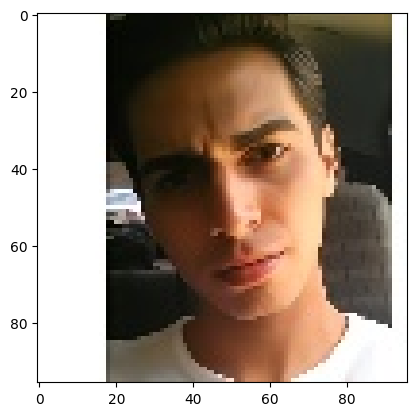

In [9]:
plt.imshow(imgs[1])

In [10]:
med_vec = []
for i,pic in enumerate(imgs):
    med_pic = np.median(pic)
    med_vec.append(med_pic)

In [11]:
lower_vec = []
upper_vec = []
for i,med in enumerate(med_vec):
    lower_pic = int(max(0,.7*med))
    upper_pic = int(min(255,1.3*med))
    lower_vec.append(lower_pic)
    upper_vec.append(upper_pic)

In [13]:
blurred_vec = []
for i,pic in enumerate(imgs):
    blurred_pic = cv2.blur(pic,ksize=(5,5))
    blurred_vec.append(blurred_pic)

In [15]:
edges_vec = []
for i,pic in enumerate(blurred_vec):
    edges = cv2.Canny(pic,threshold1=lower_vec[i],threshold2=upper_vec[i])
    edges_vec.append(edges)

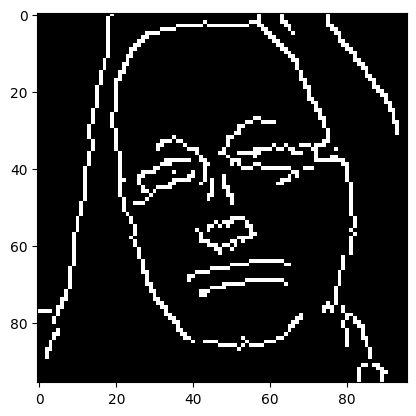

In [26]:
plt.imshow(edges_vec[255],cmap='gray')

(96, 96)